# Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [2]:
# configuring API
quandl.ApiConfig.api_key = 'ybgCtccxwR8nvs9X3MkM'

In [3]:
# federal reserve economic data
data = quandl.get('FRED/NROU')

# Checking Data

In [4]:
data.head(5)

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [5]:
data.shape

(332, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
# creating subset
data_2 = data.reset_index()

In [8]:
data_2.shape

(332, 2)

In [9]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [10]:
# setting the date as the index

from datetime import datetime

data_sub['datetime']=pd.to_datetime(data_sub['Date']) #create a datetime column from 'Date'
data_sub=data_sub.set_index('datetime') # set the datetime as the index of the dataframe
data_sub.drop(['Date'], axis=1, inplace=True) # drop the "Date" column
data_sub.head()

C:\Users\William\AppData\Local\Temp\ipykernel_11680\1025382439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['datetime']=pd.to_datetime(data_sub['Date']) #create a datetime column from 'Date'


,Value
datetime,
1980-01-01,6.217371
1980-04-01,6.210709
1980-07-01,6.203388
1980-10-01,6.195496
1981-01-01,6.187123


# Decomposition

In [11]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [13]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

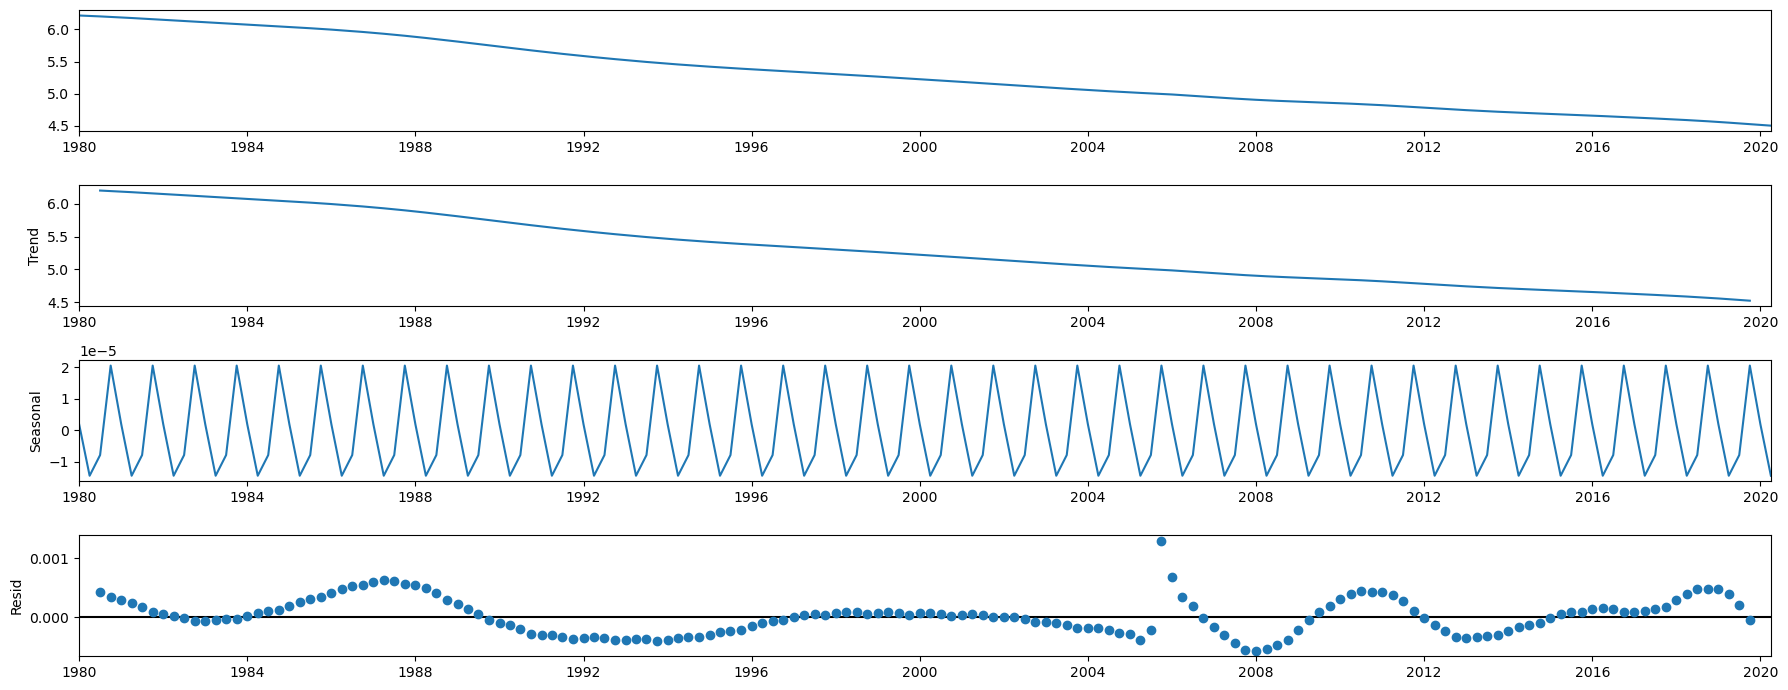

In [14]:
# Plot the separate components

decomposition.plot()
plt.show()